# LINEAR MACHINE LEARNING ALGO

In [1]:
# Import
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from python_speech_features import mfcc
from python_speech_features import logfbank
from sklearn import neighbors
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 5]
import warnings
warnings.filterwarnings('ignore')

# Get Data From File

In [2]:
ROOT_DIR = os.path.relpath("C:\Temp\MeasHydroDone\VarPompe\Features_extract")
os.chdir(ROOT_DIR)

# Split Dataset between Train and test set

In [3]:
"""
    Split dataset into train/test (70/30)
"""
def split_dataset(dataset, testsize=0.1):
    train, test = train_test_split(dataset, test_size=testsize, random_state=35)
    train_labels = train['FlowRate'].astype(float).to_numpy()
    train_features = train.drop(['FlowRate'], axis=1).to_numpy()
    test_labels = test['FlowRate'].astype(float).to_numpy()
    test_features = test.drop(['FlowRate'], axis=1).to_numpy()

    print("Train data = ", len(train_features), " Test data = ", len(test_features))
    return train_features, train_labels, test_features, test_labels

# Scale features

In [4]:
"""
    Scale the train and the test set
"""
def scale_features(train_features, test_features):
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_n = scaler.transform(train_features)
    test_features_n = scaler.transform(test_features)
    return train_features_n, test_features_n

# PCA Dimentionaly Reduction

In [5]:
"""
    PCA for dimentionaly reduction
"""
def reduce_features(train_features_n, test_features_n):
    pca = PCA(0.99)  # Variance of the features
    pca.fit(train_features_n)
    print(pca.n_components_)
    train_features_pca = pca.transform(train_features_n)
    test_features_pca = pca.transform(test_features_n)
    return train_features_pca, test_features_pca

## PREPARE DATA AND SPLIT TRAIN / FIXED TEST

In [6]:
def split_dataset_fixed(dataset, testsize=0.1):
    dataset = dataset.sort_values(by=['FlowRate'])

    len_data = len(dataset)
    y_len = int(len_data * testsize)
    x_len = len_data - y_len
    print(y_len, x_len)

    inter_y = int(np.trunc(len_data / y_len))

    test_data = pd.DataFrame()
    train_data = dataset
    for x in range(1, len_data, inter_y):
        test_data = test_data.append(dataset.iloc[x,:])
        train_data = train_data.drop(x)

    train_y = train_data['FlowRate'].astype(float).to_numpy()
    train_X = train_data.drop(['FlowRate'], axis=1).to_numpy()
    test_y = test_data['FlowRate'].astype(float).to_numpy()
    test_X = test_data.drop(['FlowRate'], axis=1).to_numpy()

    idx = np.random.permutation(len(train_X))

    return train_X, train_y, test_X, test_y


# GridSearch

Train data =  684  Test data =  172
7
Start Model :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Grid Search Best Param :  {'bootstrap': True, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300}
Y True :  [18.4 26.2 17.6 16.6 28.1  9.3 19.4 10.1 14.8 19.4 30.1 19.4 26.2 15.5
 11.4 30.9 30.9 32.9 13.2 16.2 29.2 12.3 14.4 18.4  9.3 15.5 25.2 22.1
 15.5 32.9 26.3 26.3 34.  29.2  9.3 30.1 18.3 25.2 24.6 24.5 18.4 16.2
 16.6 11.  27.3 34.9 22.3 25.8 19.4 12.3 10.4  9.2 25.3 32.1 23.4 22.9
  9.2  9.2 21.4 23.4 32.1 34.9 13.2 21.4 11.4 22.3 22.9 16.2 18.4 32.9
 17.4 15.3 13.6 14.8 21.4 34.9 24.  34.3 30.9 25.3 24.5 18.3 27.4 34.
 32.5 29.2 18.4  9.2 21.  20.  14.8 14.4 18.3 21.4 34.  12.3 14.8 30.1
 10.4 16.6 25.2 24.5 28.  16.7 27.3 21.  16.2 29.1 25.2 25.3 12.3 21.4
 22.9 22.9 25.2 34.9 30.1 30.1 32.1 34.9 22.3 13.6 10.1 15.5 34.  13.2
 32.9 12.4 34.9 26.9 27.3 25.2 30.9 23.4 34.9 30.1 11.4 28.1  9.2  9.3
 14.8 34.  32.9  9.2 29.1 17.4 15.5 33.6 30.9 28.1 11.4 20.5 31.9 32.1
 10.4 13.6 23.4 21.4 28.7 17.6 30.9 18.4  9.2 24.5 27.3 14.

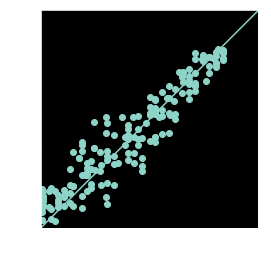

Start Model :  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
Fitting 5 folds for each of 47 candidates, totalling 235 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


Grid Search Best Param :  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Y True :  [18.4 26.2 17.6 16.6 28.1  9.3 19.4 10.1 14.8 19.4 30.1 19.4 26.2 15.5
 11.4 30.9 30.9 32.9 13.2 16.2 29.2 12.3 14.4 18.4  9.3 15.5 25.2 22.1
 15.5 32.9 26.3 26.3 34.  29.2  9.3 30.1 18.3 25.2 24.6 24.5 18.4 16.2
 16.6 11.  27.3 34.9 22.3 25.8 19.4 12.3 10.4  9.2 25.3 32.1 23.4 22.9
  9.2  9.2 21.4 23.4 32.1 34.9 13.2 21.4 11.4 22.3 22.9 16.2 18.4 32.9
 17.4 15.3 13.6 14.8 21.4 34.9 24.  34.3 30.9 25.3 24.5 18.3 27.4 34.
 32.5 29.2 18.4  9.2 21.  20.  14.8 14.4 18.3 21.4 34.  12.3 14.8 30.1
 10.4 16.6 25.2 24.5 28.  16.7 27.3 21.  16.2 29.1 25.2 25.3 12.3 21.4
 22.9 22.9 25.2 34.9 30.1 30.1 32.1 34.9 22.3 13.6 10.1 15.5 34.  13.2
 32.9 12.4 34.9 26.9 27.3 25.2 30.9 23.4 34.9 30.1 11.4 28.1  9.2  9.3
 14.8 34.  32.9  9.2 29.1 17.4 15.5 33.6 30.9 28.1 11.4 20.5 31.9 32.1
 10.4 13.6 23.4 21.4 28.7 17.6 30.9 18.4  9.2 24.5 27.3 14.8 29.1 13.2
 11.  30.9 13.6 34. ]
Y Pred :  [19.65544028 20.36854505 19.65616032 2

[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    7.1s finished


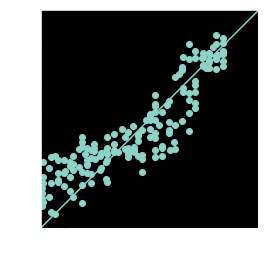

In [39]:
rfr_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 150, 200],
    'max_features': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [4, 6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500]
}
'''
svr_grid = [{'kernel': ['rbf'], 'tol': [0.1], 'gamma': [1], 'C': [0.001, 0.01, 0.1, 10, 100]},
            {'kernel': ['linear'], 'tol': [0.1], 'C': [10, 100, 1000]},
            {'kernel': ['poly'], 'tol': [0.1], 'gamma': [1], 'degree': [2, 3], 'C': [0.1, 10, 100, 1000]},
            {'kernel': ['sigmoid'], 'tol': [0.1], 'gamma': [1], 'C': [0.001, 0.01, 0.1, 10, 100]}]
'''
svr_grid = [{'kernel': ['rbf'], 'gamma': [1e-8, 1e-6,1e-4, 1e-2, 1, 1e2, 1e4], 'C': [0.001, 0.01, 0.1, 10, 100]},
            {'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]},
            {'kernel': ['sigmoid'], 'tol': [0.1], 'gamma': [1], 'C': [0.001, 0.01, 0.1, 10, 100]}]

model = [RandomForestRegressor(), SVR()]
grid = [rfr_grid, svr_grid]
#model = [SVR()]
#grid = [svr_grid]

dataset = pd.read_csv('C:/Temp/MeasHydroDone/Features/features_50_150.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.2)
#train_X, train_y, test_X, test_y = split_dataset_fixed(dataset, testsize=0.2)

train_X_n, test_X_n = scale_features(train_X, test_X)
train_X_r, test_X_r = reduce_features(train_X_n, test_X_n)

for i in range(len(grid)):
    print("Start Model : ", model[i])
    grid_search = GridSearchCV(estimator = model[i], param_grid = grid[i], cv = 5, n_jobs = -1, verbose = 2)

    # Fit the grid search to the data
    grid_search.fit(train_X_r, train_y)
    print("Grid Search Best Param : ", grid_search.best_params_)
    # Print the results
    y_true, y_pred = test_y, grid_search.predict(test_X_r)
    print("Y True : ", np.array(y_true))
    print("Y Pred : ", y_pred)
    print("MSE : ", mean_squared_error(y_true, y_pred))
    plotTestPred(y_true, y_pred)

### Plot Test prediction VS Test labels

In [27]:
def plotTestPred(test_labels, test_predictions):
    diff_pred = test_predictions - test_labels
    print("Diff Min = ", diff_pred.min(), " Max = ", diff_pred.max())
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('True Values [m3/h]')
    plt.ylabel('Predictions [m3/h]')
    lims = [9, 40]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

### TEST RANDOM FOREST REGRESSOR

Train data =  770  Test data =  86
7
Diff Min =  -6.353438341207774  Max =  7.212601733453166


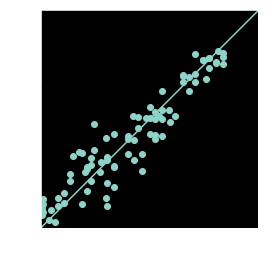

In [28]:
dataset = pd.read_csv('C:/Temp/MeasHydroDone/Features/features_50_150.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.1)
# Pre-processing
train_X_n, test_X_n = scale_features(train_X, test_X)
train_X_r, test_X_r = reduce_features(train_X_n, test_X_n)
# Use best result with grid search
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rfr.fit(train_X_r, train_y)
y_true, y_pred = test_y, rfr.predict(test_X_r)
plotTestPred(y_true, y_pred)

### Test Support Vector Regressor

Diff Min =  -8.05736968532019  Max =  8.87698371610291


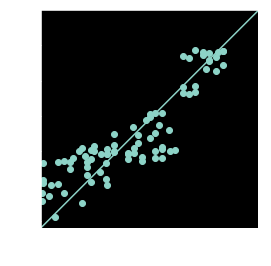

In [29]:
# Use Grid Search result
clf = SVR(kernel='rbf', gamma=0.01, C=100)
clf.fit(train_X_r, train_y)
y_true, y_pred = test_y, clf.predict(test_X_r)
plotTestPred(y_true, y_pred)

### Test RFR + SVR + KNN

In [37]:
input_directory = "C:\Temp\MeasHydroDone\VarPompe\Features_extract"
list_files = os.listdir(input_directory)

rfr_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
svr_grid = [{'kernel': ['rbf'], 'gamma': [1e-8, 1e-6,1e-4, 1e-2, 1, 1e2, 1e4], 'C': [0.001, 0.01, 0.1, 10, 100]},
            {'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]},
            {'kernel': ['sigmoid'], 'tol': [0.1], 'gamma': [1], 'C': [0.001, 0.01, 0.1, 10, 100]}]
''' GRID SEARCH WITH RFR '''
def check_RFR(train_features_pca, train_labels, test_features_pca, test_labels):
    grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = rfr_grid, cv = 3, n_jobs = -1, verbose = 0)
    # Fit the grid search to the data
    grid_search.fit(train_features_pca, train_labels)
    print("Grid Search Best Param : ", grid_search.best_params_)
    # Print the results
    y_true, y_pred = test_labels, grid_search.predict(test_features_pca)
    print("Y True : ", np.array(y_true))
    print("Y Pred : ", y_pred)
    print("MSE : ", mean_squared_error(y_true, y_pred))
''' GRID SEARCH WITH SVR '''
def check_SVR(train_features_pca, train_labels, test_features_pca, test_labels):
    grid_search = GridSearchCV(estimator = SVR(), param_grid = svr_grid, cv = 3, n_jobs = -1, verbose = 1)
    # Fit the grid search to the data
    grid_search.fit(train_features_pca, train_labels)
    print("Grid Search Best Param : ", grid_search.best_params_)
    # Print the results
    y_true, y_pred = test_labels, grid_search.predict(test_features_pca)
    print("Y True : ", np.array(y_true))
    print("Y Pred : ", y_pred)
    print("MSE : ", mean_squared_error(y_true, y_pred))
    plotTestPred(y_true, y_pred)
''' PSEUDO GRID SEARCH WITH KNN '''
def check_knn(train_features_pca, train_labels, test_features_pca, test_labels):
    best_k = 0
    best_error = 100
    for K in range(20):
        K = K+1
        model = neighbors.KNeighborsRegressor(n_neighbors = K)

        model.fit(train_features_pca, train_labels)  #fit the model
        pred=model.predict(test_features_pca) #make prediction on test set
        error = mean_squared_error(test_labels,pred) #calculate mse
        if(error < best_error):
            best_error = error
            best_k = K
    return best_k, best_error

list_files = ['C:/Temp/MeasHydroDone/Features/features_50_150.csv']
''' Check all differents features previously extracted '''
for file in list_files:
    print(file)
    dataset = pd.read_csv(file)
    dataset = dataset.drop(dataset.columns[0], axis=1)
    train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.2)
    #train_X, train_y, test_X, test_y = split_dataset_fixed(dataset, testsize=0.1)
    
    train_X_n, test_X_n = scale_features(train_X, test_X)
    train_X_r, test_X_r = reduce_features(train_X_n, test_X_n)

    best_k, best_error = check_knn(train_X_r, train_y, test_X_r, test_y)
    print("Best result for ", file, " is best_k = ", best_k, ", best_error = ", best_error)
    #check_RFR(train_X_r, train_y, test_X_r, test_y)
    
    model = neighbors.KNeighborsRegressor(n_neighbors = best_k)
    model.fit(train_X_r, train_y)  #fit the model
    pred=model.predict(test_X_r) #make prediction on test set
    error = mean_squared_error(test_y,pred) #calculate mse
    diff = test_y-pred
    
    print("MSE : ", error)
    print("Diff_max = ", diff.max(), ", Diff_min = ", diff.min())    
    plotTestPred(test_y, pred)

    

C:/Temp/MeasHydroDone/Features/features_50_150.csv
Train data =  684  Test data =  172
7
Best result for  C:/Temp/MeasHydroDone/Features/features_50_150.csv  is best_k =  4 , best_error =  8.678702761627905
MSE :  8.678702761627905
Diff_max =  6.149999999999999 , Diff_min =  -9.024999999999997
Diff Min =  -6.149999999999999  Max =  9.024999999999997


### TEST OTHERS CLASSIFIERS

In [38]:
from sklearn import linear_model

dataset = pd.read_csv('C:/Temp/MeasHydroDone/Features/features_50_150.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
train_X, train_y, test_X, test_y = split_dataset(dataset, testsize=0.2)

train_X_n, test_X_n = scale_features(train_X, test_X)
train_X_r, test_X_r = reduce_features(train_X_n, test_X_n)

classifiers = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for classifier in classifiers:
    clf = classifier
    clf.fit(train_X_r, train_y)
    pred=clf.predict(test_X_r)
    error = mean_squared_error(test_y,pred) #calculate mse
    print(classifier)
    print(error)
    # plotTestPred(test_y, pred)

Train data =  684  Test data =  172
7
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
28.86201806132674
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
27.85520065774425
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
62.71039180212875
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_inter